Upload project_archive.zip file first

--- Successfully extracted project_archive.zip to access the data. ---
--- Generating the plot... ---


/tmp/ipython-input-1203240989.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='city', y='num_samples', data=client_distribution_sorted.head(10), palette='viridis')
/tmp/ipython-input-1203240989.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='city', y='mean_claim', data=client_distribution_sorted.head(10), palette='plasma')
/tmp/ipython-input-1203240989.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='city', y='smoker_rate', data=client_distribution_sorted.head(10), palette='magma')


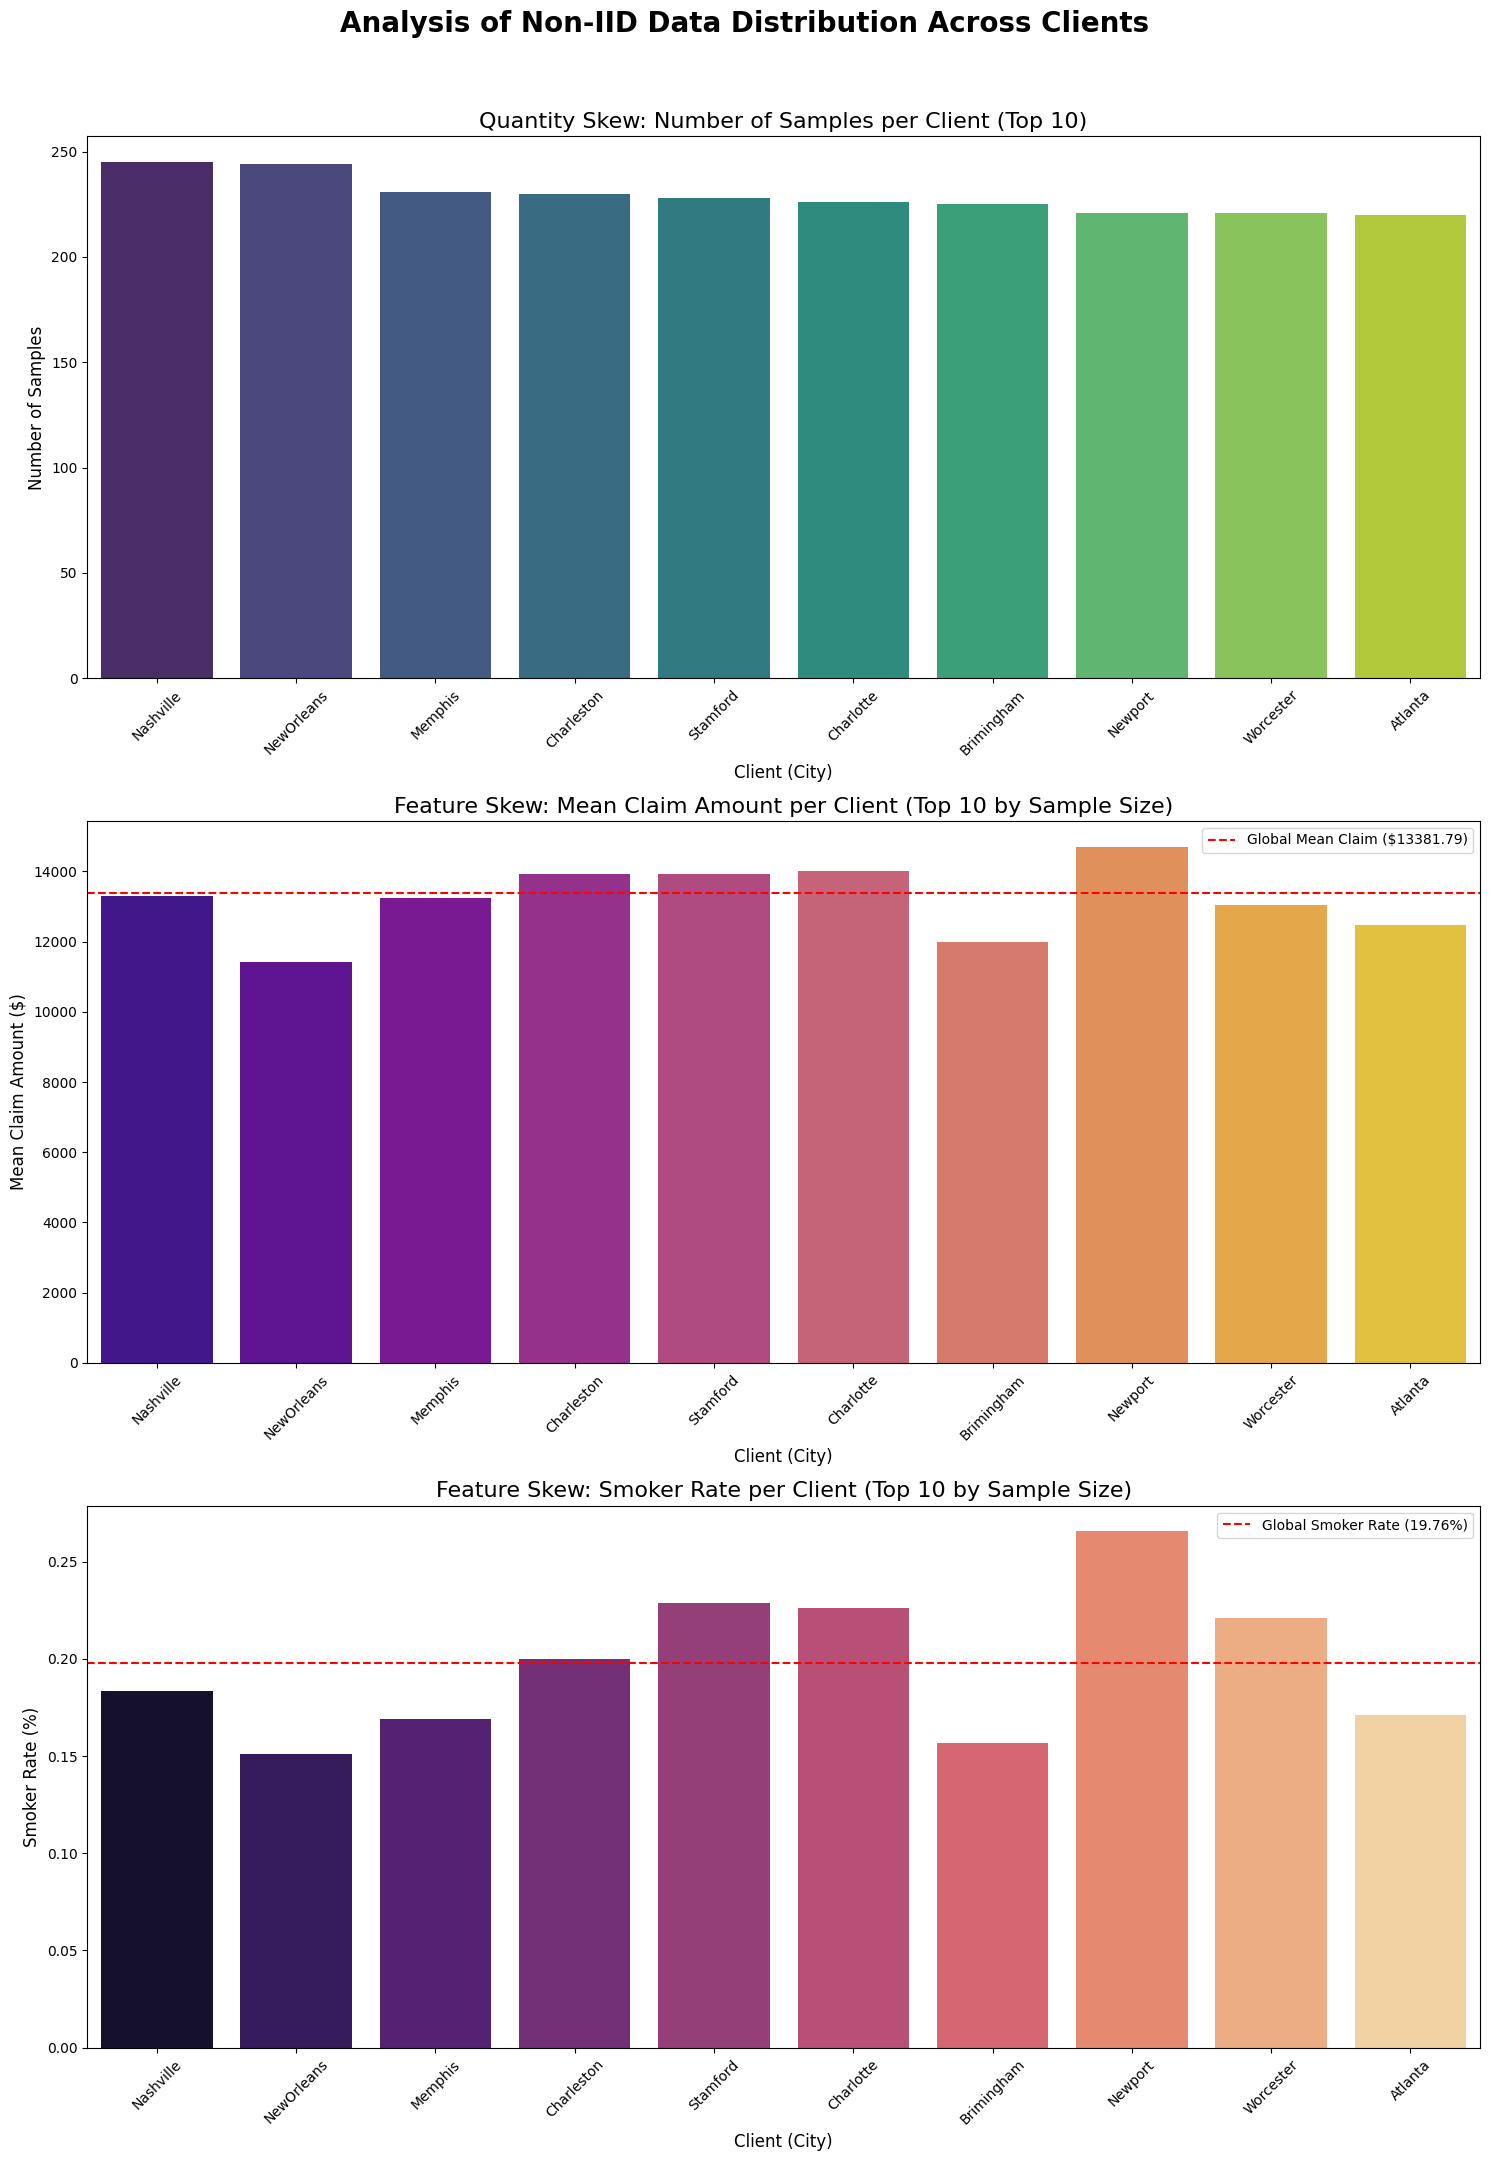

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# --- 1. Define file paths and extract the CSV ---
zip_path = 'project_archive.zip'
csv_path = 'fl-tabular/health.csv'

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"--- Successfully extracted {zip_path} to access the data. ---")

    # --- 2. Load and split the data ---
    data = pd.read_csv(csv_path)
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

    # --- 3. Analyze the distribution of the TRAINING data ---
    client_distribution = X_train.groupby('city').agg(
        num_samples=('age', 'count'),
        mean_claim=('claim', 'mean'),
        smoker_rate=('smoker', 'mean')
    ).reset_index()

    global_means = X_train[['claim', 'smoker']].mean()

    # --- 4. Visualize the Non-IID Data Distribution ---
    print("--- Generating the plot... ---")

    # Sort clients by number of samples for better visualization
    client_distribution_sorted = client_distribution.sort_values(by='num_samples', ascending=False)

    # Set up the plot
    fig, axes = plt.subplots(3, 1, figsize=(15, 22))
    fig.suptitle('Analysis of Non-IID Data Distribution Across Clients', fontsize=20, weight='bold')

    # Plot 1: Quantity Skew (Number of Samples per Client)
    sns.barplot(ax=axes[0], x='city', y='num_samples', data=client_distribution_sorted.head(10), palette='viridis')
    axes[0].set_title('Quantity Skew: Number of Samples per Client (Top 10)', fontsize=16)
    axes[0].set_xlabel('Client (City)', fontsize=12)
    axes[0].set_ylabel('Number of Samples', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)

    # Plot 2: Feature Distribution Skew (Mean Claim Amount)
    sns.barplot(ax=axes[1], x='city', y='mean_claim', data=client_distribution_sorted.head(10), palette='plasma')
    axes[1].axhline(global_means['claim'], color='r', linestyle='--', label=f"Global Mean Claim (${global_means['claim']:.2f})")
    axes[1].set_title('Feature Skew: Mean Claim Amount per Client (Top 10 by Sample Size)', fontsize=16)
    axes[1].set_xlabel('Client (City)', fontsize=12)
    axes[1].set_ylabel('Mean Claim Amount ($)', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend()

    # Plot 3: Feature Distribution Skew (Smoker Rate)
    sns.barplot(ax=axes[2], x='city', y='smoker_rate', data=client_distribution_sorted.head(10), palette='magma')
    axes[2].axhline(global_means['smoker'], color='r', linestyle='--', label=f"Global Smoker Rate ({global_means['smoker']:.2%})")
    axes[2].set_title('Feature Skew: Smoker Rate per Client (Top 10 by Sample Size)', fontsize=16)
    axes[2].set_xlabel('Client (City)', fontsize=12)
    axes[2].set_ylabel('Smoker Rate (%)', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find '{zip_path}'. Please upload the zip file to your Colab session.")